In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding, Flatten

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [2]:
df = pd.read_csv("/content/drive/MyDrive/NLP (7:30-9:30) sk/Code/review.csv")
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [3]:
positive = ' '.join(df[df["sentiment"]==1]["review"])
negative = ' '.join(df[df["sentiment"]==0]["review"])

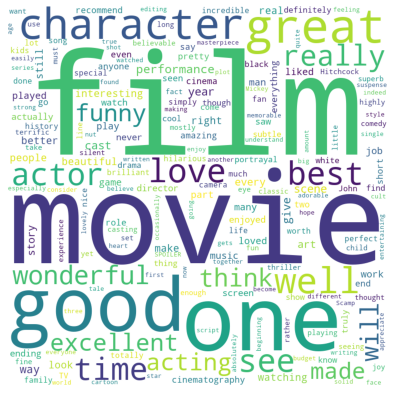

In [4]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(positive)
  
plt.figure(figsize=(7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

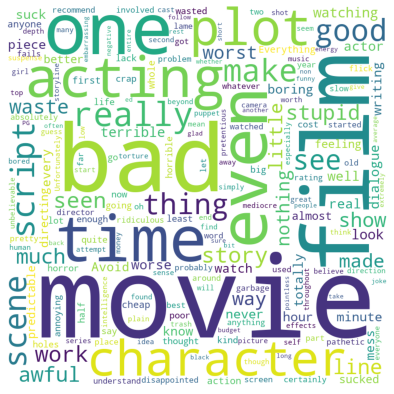

In [5]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(negative)
  
plt.figure(figsize=(7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [6]:
# feature target split
X = df["review"]
y = df["sentiment"]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
# Keras tokenization

tok = Tokenizer()
tok.fit_on_texts(X_train)

In [9]:
vocabulary = tok.index_word
print(vocabulary)

{1: 'the', 2: 'and', 3: 'a', 4: 'of', 5: 'is', 6: 'this', 7: 'it', 8: 'i', 9: 'to', 10: 'in', 11: 'was', 12: 'movie', 13: 'film', 14: 'that', 15: 'for', 16: 'with', 17: 'as', 18: 'but', 19: 'are', 20: 'on', 21: 'not', 22: "it's", 23: 'just', 24: 'one', 25: 'you', 26: 'bad', 27: 'an', 28: 'all', 29: 'so', 30: 'about', 31: 'at', 32: 'very', 33: 'there', 34: 'like', 35: 'good', 36: 'by', 37: 'from', 38: 'have', 39: 'time', 40: 'he', 41: 'out', 42: 'even', 43: 'acting', 44: 'has', 45: 'his', 46: 'be', 47: 'were', 48: 'well', 49: 'if', 50: 'great', 51: 'who', 52: 'characters', 53: 'how', 54: 'more', 55: 'my', 56: 'or', 57: 'really', 58: 'see', 59: 'when', 60: 'some', 61: 'than', 62: 'no', 63: 'best', 64: 'plot', 65: 'made', 66: 'story', 67: 'movies', 68: 'character', 69: "didn't", 70: 'most', 71: 'scenes', 72: 'wonderful', 73: 'its', 74: 'better', 75: "don't", 76: '10', 77: 'me', 78: 'ever', 79: 'they', 80: 'what', 81: 'which', 82: 'also', 83: 'can', 84: 'only', 85: 'real', 86: 'work', 87: 

In [10]:
vocab_length = len(vocabulary)
vocab_length

2486

In [11]:
# Sequence
train_sequence = tok.texts_to_sequences(X_train)
print(train_sequence)

[[7, 912, 60, 913, 529, 16, 914, 2, 530, 2, 4, 531, 44, 915, 532, 102], [6, 5, 3, 377, 12], [18, 7, 5, 378, 916], [1, 533, 31, 917, 47, 918, 2, 66, 5, 29, 132, 7, 919, 534, 379, 30, 81, 535, 920, 3, 921, 922, 1, 923, 9, 244, 380, 381, 8, 23, 69, 297, 30, 107, 4, 6, 13, 2, 382, 21, 9, 245, 924, 213, 3, 925, 536, 9, 926, 537, 927], [1, 12, 44, 188, 62, 246, 71, 10, 7, 2, 32, 115, 214], [1, 928, 71, 19, 133, 929, 189, 34, 383, 930, 134, 247, 931, 932, 31, 384, 14, 19, 76, 933, 934, 4, 1, 935, 385], [936, 77, 3, 538, 18, 8, 91, 6, 5, 24, 4, 1, 63, 67, 78], [8, 116, 21, 937, 9, 42, 117, 7, 15, 32, 215, 15, 539, 4, 938, 8, 939], [22, 29, 26, 22, 147, 135, 216, 23, 15, 14, 540], [6, 12, 5, 82, 541], [6, 12, 5, 29, 386], [542, 940, 11, 387, 388], [22, 136, 543, 14, 6, 72, 13, 11, 65, 10, 941, 17, 544, 298, 108, 73, 942, 943, 10, 1, 944, 945, 217, 2, 299, 529, 31, 14, 39], [10, 248, 8, 148, 7, 74, 61, 946, 16, 3, 947, 2, 8, 148, 6, 948, 949, 950, 74, 61, 951, 389], [8, 300, 952, 1, 162, 39, 8, 

In [12]:
# Length of all documents
doc_length = []
for doc in train_sequence:
  doc_length.append(len(doc))

In [13]:
max(doc_length)

69

In [14]:
# 90% quantile
# 90% document length is less than or equal to 30
np.quantile(doc_length, 0.9)

27.0

In [15]:
# 99% quantile
# 99% document length is less than or equal to 45
np.quantile(doc_length, 0.99)

45.0

In [16]:
max_length = 45

In [17]:
# Padding
train_matrix = sequence.pad_sequences(train_sequence,maxlen=max_length)
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]], dtype=int32)

In [18]:
# Testing data
test_sequence = tok.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,maxlen=max_length)
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]], dtype=int32)

In [19]:
# model
model = Sequential()
model.add(Embedding(input_dim=vocab_length+1, # vocabulary length, +1 -> 0 tokens
                    input_length=max_length,  # max length of document -> 45
                    output_dim=100,           # hyperparameter -> vector length of each token
                    mask_zero=True))          # do not learn for 0 token
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [20]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=20,batch_size=32)

Epoch 1/20
22/22 [==============================] - 1s 7ms/step - loss: 0.6941
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.6820
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6264
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.4362
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1815
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0482
Epoch 7/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 8/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 9/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 10/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 11/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 12/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 13/20
22/22 [==============================

In [21]:
# prediction
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       151
           1       0.68      0.66      0.67       149

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300



## Handle emoji

In [22]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [23]:
!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 7.4 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=58ad05fa13ca15e5a49f1ef20e56378f83e080cb389643f06a256aa2a309c3fe
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [24]:
# convert emoji to text
def convert_emoji_to_text(doc):
  return emoji.demojize(doc)

In [25]:
df["review"] = df["review"].apply(convert_emoji_to_text)
df["review"].head()

0    Not sure who was more lost - the flat characte...
1    Attempting artiness with black & white and cle...
2           Very little music or anything to speak of.
3    The best scene in the movie was when Gerardo i...
4    The rest of the movie lacks art, charm, meanin...
Name: review, dtype: object

In [27]:
# remove emoji
def remove_emoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [28]:
df["review"] = df["review"].apply(remove_emoji)
df["review"].head()

0    Not sure who was more lost - the flat characte...
1    Attempting artiness with black & white and cle...
2           Very little music or anything to speak of.
3    The best scene in the movie was when Gerardo i...
4    The rest of the movie lacks art, charm, meanin...
Name: review, dtype: object